# Object Detection using TensorFlow - Comparison of various Models

In [1]:
# importing the necessary libraries
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util

# in order to display the images in line
%matplotlib inline
sys.path.append("..")

In [2]:
# path to the download url 
download_url = 'http://download.tensorflow.org/models/object_detection/'

##### Choosing SSD with MobileNet Model

In [3]:
# choosing a model to downlaod
model = 'ssd_mobilenet_v1_coco_11_06_2017'
model_tar = model + '.tar.gz'
# path to the pb file
path = model + '/frozen_inference_graph.pb'
# path to the labels of the pretrained dataset
label_path = os.path.join('data', 'mscoco_label_map.pbtxt')
# 90 classes
classes_num = 90

In [4]:
# opens the tar file and downloads the model to our system
opener = urllib.request.URLopener()
opener.retrieve(download_url + model_tar, model_tar)
file = tarfile.open(model_tar)
print(file)
for each_file in file.getmembers():
    each_file_name = os.path.basename(each_file.name)
    if 'frozen_inference_graph.pb' in each_file_name:
        file.extract(each_file, os.getcwd())

In [5]:
# loading a frozen tensorflow model into memory
graph_detection = tf.Graph()
with graph_detection.as_default():
    graph_def = tf.GraphDef()
    with tf.gfile.GFile(path, 'rb') as fid:
        graph_serialized = fid.read()
        graph_def.ParseFromString(graph_serialized)
        tf.import_graph_def(graph_def, name='')

In [6]:
# loading labels and their mappings
label_map = label_map_util.load_labelmap(label_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=classes_num, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
# load images into a numpy array which consists of the dimensions of each image
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8) 

In [8]:
# path where the test images are stored
test_images_dir = 'test_images'
test_image_path = [ os.path.join(test_images_dir, 'ILSVRC2017_test_00000013.jpeg')]

# Size of the output images in inches
image_size = (8, 5)

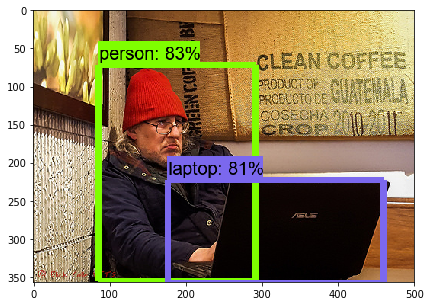

In [9]:
with graph_detection.as_default():
    with tf.Session(graph=graph_detection) as sess:
        for image_path in test_image_path:
            
            # opening images from the path
            image = Image.open(image_path)
            
            # array representation of the image used later to prepare the result image with bounding boxes with labels on it
            image_np = load_image_into_numpy_array(image)
            
            # expanding the dimensions of the image as the model expects images to have the shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = graph_detection.get_tensor_by_name('image_tensor:0')
            
            # each box represents parts of the image where a particular object was detected
            boxes = graph_detection.get_tensor_by_name('detection_boxes:0')
            
            # each score represents the level of confidence for each of the objects
            # this score is shown on the result image along with the class label
            scores = graph_detection.get_tensor_by_name('detection_scores:0')
            classes = graph_detection.get_tensor_by_name('detection_classes:0')
            num_detections = graph_detection.get_tensor_by_name('num_detections:0')
            
            # Actual detection
            (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            
            # Visualization of the results of an indentified object
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=image_size)
            plt.imshow(image_np)

#### Choosing SSD Inception V2 model

In [10]:
# choosing a model to downlaod
model = 'ssd_inception_v2_coco_2017_11_17'
model_tar = model + '.tar.gz'
# path to the pb file
path = model + '/frozen_inference_graph.pb'
# path to the labels of the pretrained dataset
label_path = os.path.join('data', 'mscoco_label_map.pbtxt')
# 90 classes
classes_num = 90

In [11]:
# opens the tar file and downloads the model to our system
opener = urllib.request.URLopener()
opener.retrieve(download_url + model_tar, model_tar)
file = tarfile.open(model_tar)
print(file)
for each_file in file.getmembers():
    each_file_name = os.path.basename(each_file.name)
    if 'frozen_inference_graph.pb' in each_file_name:
        file.extract(each_file, os.getcwd())

In [12]:
# loading a frozen tensorflow model into memory
graph_detection = tf.Graph()
with graph_detection.as_default():
    graph_def = tf.GraphDef()
    with tf.gfile.GFile(path, 'rb') as fid:
        graph_serialized = fid.read()
        graph_def.ParseFromString(graph_serialized)
        tf.import_graph_def(graph_def, name='')

In [13]:
# loading labels and their mappings
label_map = label_map_util.load_labelmap(label_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=classes_num, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

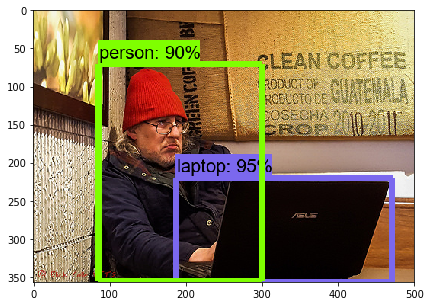

In [14]:
with graph_detection.as_default():
    with tf.Session(graph=graph_detection) as sess:
        for image_path in test_image_path:
            
            # opening images from the path
            image = Image.open(image_path)
            
            # array representation of the image used later to prepare the result image with bounding boxes with labels on it
            image_np = load_image_into_numpy_array(image)
            
            # expanding the dimensions of the image as the model expects images to have the shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = graph_detection.get_tensor_by_name('image_tensor:0')
            
            # each box represents parts of the image where a particular object was detected
            boxes = graph_detection.get_tensor_by_name('detection_boxes:0')
            
            # each score represents the level of confidence for each of the objects
            # this score is shown on the result image along with the class label
            scores = graph_detection.get_tensor_by_name('detection_scores:0')
            classes = graph_detection.get_tensor_by_name('detection_classes:0')
            num_detections = graph_detection.get_tensor_by_name('num_detections:0')
            
            # Actual detection
            (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            
            # Visualization of the results of an indentified object
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=image_size)
            plt.imshow(image_np)

##### The SSD Inception V2 model results in a better accuracy in detecting the objects in the images when compared to the SSD with MobileNets

##### Choosing Faster RCNN Inception

In [15]:
# choosing a model to downlaod
model = 'faster_rcnn_inception_v2_coco_2018_01_28'
model_tar = model + '.tar.gz'
# path to the pb file
path = model + '/frozen_inference_graph.pb'
# path to the labels of the pretrained dataset
label_path = os.path.join('data', 'mscoco_label_map.pbtxt')
# 90 classes
classes_num = 90

In [16]:
# opens the tar file and downloads the model to our system
opener = urllib.request.URLopener()
opener.retrieve(download_url + model_tar, model_tar)
file = tarfile.open(model_tar)
print(file)
for each_file in file.getmembers():
    each_file_name = os.path.basename(each_file.name)
    if 'frozen_inference_graph.pb' in each_file_name:
        file.extract(each_file, os.getcwd())

In [17]:
# loading a frozen tensorflow model into memory
graph_detection = tf.Graph()
with graph_detection.as_default():
    graph_def = tf.GraphDef()
    with tf.gfile.GFile(path, 'rb') as fid:
        graph_serialized = fid.read()
        graph_def.ParseFromString(graph_serialized)
        tf.import_graph_def(graph_def, name='')

In [19]:
# loading labels and their mappings
label_map = label_map_util.load_labelmap(label_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=classes_num, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

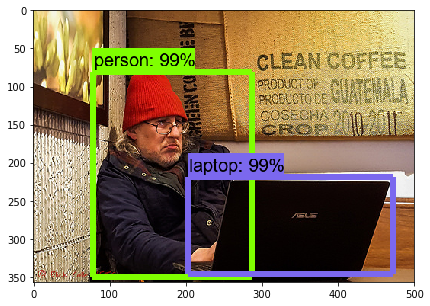

In [20]:
with graph_detection.as_default():
    with tf.Session(graph=graph_detection) as sess:
        for image_path in test_image_path:
            
            # opening images from the path
            image = Image.open(image_path)
            
            # array representation of the image used later to prepare the result image with bounding boxes with labels on it
            image_np = load_image_into_numpy_array(image)
            
            # expanding the dimensions of the image as the model expects images to have the shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = graph_detection.get_tensor_by_name('image_tensor:0')
            
            # each box represents parts of the image where a particular object was detected
            boxes = graph_detection.get_tensor_by_name('detection_boxes:0')
            
            # each score represents the level of confidence for each of the objects
            # this score is shown on the result image along with the class label
            scores = graph_detection.get_tensor_by_name('detection_scores:0')
            classes = graph_detection.get_tensor_by_name('detection_classes:0')
            num_detections = graph_detection.get_tensor_by_name('num_detections:0')
            
            # Actual detection
            (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            
            # Visualization of the results of an indentified object
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=image_size)
            plt.imshow(image_np)

#### The Faster RCNN Inception provides a better accuracy than the SSD Inception V2 model.